Regresion Simple y Metodo experimental

Primero se importan todos los ficheros a utilizar

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from google.colab import files
from scipy.stats import shapiro
from statsmodels.compat import lzip
from scipy.stats import normaltest
import statsmodels.stats.api as sms
import warnings
import statsmodels.stats.outliers_influence as oi
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind

uploaded = files.upload()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


MessageError: ignored

In [ ]:
pip install econtools

     |████████████████████████████████| 536 kB 16.2 MB/s 


In [ ]:
import econtools.metrics as mt

Segundo: Se carga la base de datos

In [ ]:
df = pd.read_excel("DatosEducacion.xlsx")

Primera observacion de los datos



In [ ]:
df.head(5)

,DIRECTORIO,P1_DEPARTAMENTO,SECUENCIA_ENCUESTA,NivelEducativoCursado,TipoEstablecimiento,UbicacionColegio,MinutosAColegio,AlimentosEscuela,PagoMatricula,PagoUniforme,PagoUtiles,PagoPension,PagoTransporte,RecibioBeca,Tratamiento,TratamientoFin
0,3013752,25,3,4,1,1,45,0,0,120000,200000,0,80000,0,0.997964,1
1,3003749,25,2,2,1,1,40,1,0,60000,50000,0,0,0,0.997443,1
2,3016628,25,4,2,0,1,5,1,80000,95000,70000,68000,0,0,0.996477,1
3,2998448,25,3,4,1,1,20,0,1000000,400000,1000000,110000,0,0,0.996050,1
4,3008596,25,2,7,1,1,120,0,1232000,0,12000,0,0,0,0.992672,1


In [ ]:
label_binarizer = LabelBinarizer()
label_binarizer_output = label_binarizer.fit_transform( df['UbicacionColegio'])
result_df1 = pd.DataFrame(label_binarizer_output, columns = label_binarizer.classes_)

df = df.join(result_df1)
df=df.rename(columns = {1:"Urbano",2:"Rural",3:"Rural disperso"})
df

,DIRECTORIO,P1_DEPARTAMENTO,SECUENCIA_ENCUESTA,NivelEducativoCursado,TipoEstablecimiento,UbicacionColegio,MinutosAColegio,AlimentosEscuela,PagoMatricula,PagoUniforme,PagoUtiles,PagoPension,PagoTransporte,RecibioBeca,Tratamiento,TratamientoFin,Urbano,Rural,Rural disperso
0,3013752,25,3,4,1,1,45,0,0,120000,200000,0,80000,0,0.997964,1,1,0,0
1,3003749,25,2,2,1,1,40,1,0,60000,50000,0,0,0,0.997443,1,1,0,0
2,3016628,25,4,2,0,1,5,1,80000,95000,70000,68000,0,0,0.996477,1,1,0,0
3,2998448,25,3,4,1,1,20,0,1000000,400000,1000000,110000,0,0,0.996050,1,1,0,0
4,3008596,25,2,7,1,1,120,0,1232000,0,12000,0,0,0,0.992672,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,2995748,25,4,3,1,1,10,0,0,120000,30000,0,0,0,0.005484,0,1,0,0
664,3008083,25,3,3,1,1,15,0,0,150000,50000,0,55000,0,0.003117,0,1,0,0
665,2996882,25,3,1,1,1,10,1,0,90000,40000,0,0,0,0.002422,0,1,0,0
666,3009224,25,6,2,1,1,20,1,0,70000,80000,0,0,0,0.001857,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DIRECTORIO             668 non-null    int64  
 1   P1_DEPARTAMENTO        668 non-null    int64  
 2   SECUENCIA_ENCUESTA     668 non-null    int64  
 3   NivelEducativoCursado  668 non-null    int64  
 4   TipoEstablecimiento    668 non-null    int64  
 5   UbicacionColegio       668 non-null    int64  
 6   MinutosAColegio        668 non-null    int64  
 7   AlimentosEscuela       668 non-null    int64  
 8   PagoMatricula          668 non-null    int64  
 9   PagoUniforme           668 non-null    int64  
 10  PagoUtiles             668 non-null    int64  
 11  PagoPension            668 non-null    int64  
 12  PagoTransporte         668 non-null    int64  
 13  RecibioBeca            668 non-null    int64  
 14  Tratamiento            668 non-null    float64
 15  Tratam

In [ ]:
X = df[['TratamientoFin','MinutosAColegio','AlimentosEscuela','PagoMatricula','PagoUniforme','PagoUtiles','PagoPension','PagoTransporte','RecibioBeca',
        'Urbano','Rural','Rural disperso']]
y = df['NivelEducativoCursado']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
results = model.fit()
results.params

const               2.433045e+00
TratamientoFin     -1.074150e-01
MinutosAColegio     1.432708e-02
AlimentosEscuela   -1.009358e+00
PagoMatricula       3.562948e-07
PagoUniforme       -1.747057e-06
PagoUtiles         -3.961297e-07
PagoPension        -1.083534e-06
PagoTransporte     -1.584964e-06
RecibioBeca         1.833092e-01
Urbano              1.158346e+00
Rural               6.602419e-01
Rural disperso      6.144574e-01
dtype: float64

In [ ]:
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     NivelEducativoCursado   R-squared:                       0.431
Model:                               OLS   Adj. R-squared:                  0.419
Method:                    Least Squares   F-statistic:                     33.74
Date:                   Fri, 20 May 2022   Prob (F-statistic):           2.83e-53
Time:                           16:58:10   Log-Likelihood:                -785.49
No. Observations:                    501   AIC:                             1595.
Df Residuals:                        489   BIC:                             1646.
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const     

Guardar los errores para luego estimar la validez de la evaluación.

In [ ]:
X_test = sm.add_constant(X_test)
y_pred = results.predict(X_test)
residual = y_test - y_pred

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Prueba de multicolinealidad (Prueba VIF): El valor VIF de cada variable no puede ser mayor a 10. Si es mayor, quiere decir que esta correlacionada con otra variable. Soluciones a la multicolinealidad: Eliminar las variables correlacionadas NO ESPERADAS.

In [ ]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,TratamientoFin,MinutosAColegio,AlimentosEscuela,PagoMatricula,PagoUniforme,PagoUtiles,PagoPension,PagoTransporte,RecibioBeca,Urbano,Rural,Rural disperso
vif,1.021511,1.371815,1.265887,1.389751,1.133718,1.289608,1.300321,1.182802,1.021523,4.3752,1.331926,2.094997


En evaluación de políticas públicas, si se utilizan muchas variables categoricas no se realiza la graficación de los errores y de la recta.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


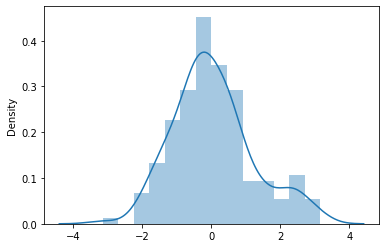

In [ ]:
sns.distplot(residual)

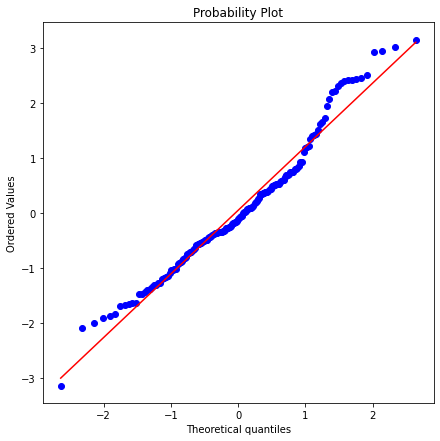

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Tests para probar la normalidad en la distribución de los errores

In [ ]:
# Shapiro-Wilk Test
# normality test
stat, p = shapiro(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.971, p=0.001
Sample does not look Gaussian (reject H0)


In [ ]:
# D'Agostino and Pearson's Test
# normality test
stat, p = normaltest(residual)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=7.758, p=0.021
Sample does not look Gaussian (reject H0)


Test de Bresuch-Pagan para detectar Heterocedasticidad. So el P-value es menor o igual a 0.005, quiere decir que hay heterocedasticidad

In [ ]:
#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]

[('Lagrange multiplier statistic', 6.003951995818433),
 ('p-value', 0.11141811013399583),
 ('f-value', 3.004944880309618),
 ('f p-value', 0.11663863538255281)]

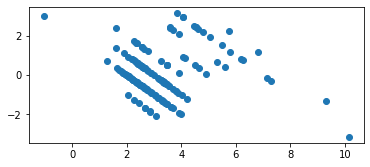

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

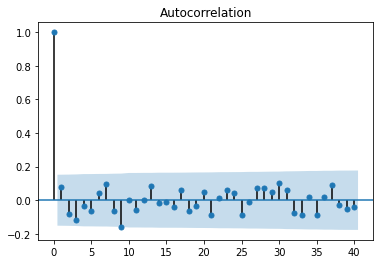

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

Test de Ramsey para determinar especificación global del modelo. Si da menor o igual a 0.005, quiere decir que el modelo no esta bien especificado.

In [ ]:
oi.reset_ramsey (results, degree = 2)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[3.24719141]]), p=0.07216294844610056, df_denom=488, df_num=1>